In [1]:
#packages
import pandas as pd

#nltk packages
import re
import string
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

#tf-idf packages
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

#sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv("Reviews.csv")

In [3]:
df.shape

(568454, 10)

In [4]:
#the data frame is half a million reviews so I'm using head to show the first 500 reviews only
df.head(500)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [5]:
# Checking Duplicate values
df.duplicated().sum()

0

### Data Preprocessing

In [6]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
#declare a var called stemmer to store stemming value in
stemmer = nltk.SnowballStemmer("english")

In [8]:
def preprocess(text):
    text = text.lower()  # Convert text to lowercase
    text = nltk.word_tokenize(text)
    text = re.sub(r'\[.*?\]', '', str(text))  # Remove text within square brackets
    text = re.sub(r'http\S+\s*\S+', '', text)  # Remove URLs starting with http
    text = re.sub(r'www\.\S+', '', text)  # Remove URLs starting with www
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\b\w*\d\w*\b', '', text)  # Remove words containing numbers
    text = ' '.join(word for word in text.split(' ') if word not in stop_words) #remove stopwords
    text = ' '.join(stemmer.stem(word) for word in text.split(' ')) #stemming
    return text

In [9]:
#apply the basic text preprocessing
df['Text_clean'] = df['Text'].apply(preprocess)

In [10]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_clean
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,


### Basic Exploratory Data Analysis (EDA)

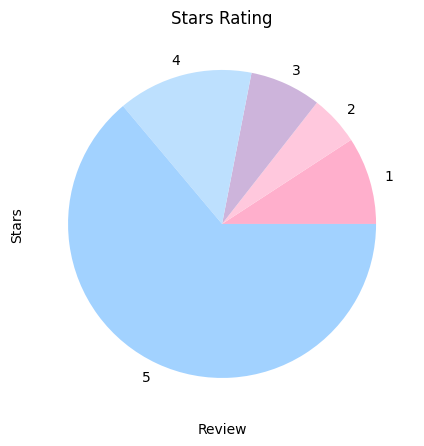

In [11]:
colors = ['#ffafcc', # 1 stars
          '#ffc8dd', # 2 stars
          '#cdb4db', # 3 stars
          '#bde0fe', # 4 stars
          '#a2d2ff'] # 5 stars
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='pie',
          title='Stars Rating',
          colors = colors,
          figsize=(10, 5))
ax.set_xlabel('Review')
ax.set_ylabel('Stars')
plt.show()

### Data Frame Sampling 

In [ ]:
data_sample = df['Text_clean'].sample(frac=0.3)

### Feature Extraction using TF-IDF

In [12]:
#create an instance to store the reviews values instead of the entire dataset
clean_df = df['Text_clean']

In [13]:
transformed = tfidf.fit_transform(clean_df)
transformed

<568454x9601 sparse matrix of type '<class 'numpy.float64'>'
	with 133084 stored elements in Compressed Sparse Row format>

In [14]:
#get the vocab list
tfidf.vocabulary_

{'store': 8089,
 'red': 6928,
 'small': 7727,
 'wintergreen': 9405,
 'refresh': 6950,
 'absolut': 37,
 'delici': 2229,
 'drive': 2557,
 'cross': 1995,
 'countri': 1921,
 'someon': 7823,
 'cut': 2069,
 'turn': 8826,
 'daughter': 2135,
 'hand': 3802,
 'say': 7337,
 'pull': 6731,
 'one': 5914,
 'put': 6767,
 'right': 7137,
 'world': 9450,
 'realli': 6880,
 'hope': 4052,
 'get': 3493,
 'someth': 7826,
 'approach': 414,
 'local': 4884,
 'cost': 1902,
 'take': 8362,
 'care': 1264,
 'lee': 4753,
 'per': 6252,
 'shot': 7577,
 'normal': 5751,
 'split': 7940,
 'sensit': 7462,
 'caffein': 1165,
 'even': 2858,
 'natur': 5569,
 'kind': 4582,
 'littl': 4870,
 'weird': 9307,
 'drink': 2552,
 'whole': 9365,
 'thing': 8543,
 'coffe': 1675,
 'husband': 4121,
 'nice': 5655,
 'wake': 9230,
 'boost': 946,
 'would': 9461,
 'recommend': 6912,
 'sinthet': 7646,
 'feel': 3060,
 'good': 3609,
 'bodi': 923,
 'order': 5956,
 'soon': 7836,
 'sure': 8265,
 'sam': 7289,
 'club': 1635,
 'deal': 2154,
 'watch': 9264,


In [15]:
all_feature_names = tfidf.get_feature_names_out()

for word in all_feature_names:
    #let's get the index in the vocabulary
    indx = tfidf.vocabulary_.get(word)
    #get the score
    idf_score = tfidf.idf_[indx]
    print(f"{word} : {idf_score}")

________ : 13.557530252806984
____________ : 13.557530252806984
_____________________ : 13.557530252806984
_______________________________________ : 13.557530252806984
_are_ : 13.557530252806984
_beware_ : 13.557530252806984
_blank : 13.152065144698819
_far_ : 13.557530252806984
_higher_ : 13.557530252806984
_however_ : 13.557530252806984
_i_ : 13.152065144698819
_is_ : 12.864383072247039
_less_ : 13.557530252806984
_lies_ : 13.557530252806984
_much_ : 13.557530252806984
_plus_ : 13.557530252806984
_quite_ : 13.557530252806984
_salty_ : 13.557530252806984
_total_ : 13.557530252806984
_wonderful_ : 13.152065144698819
_wow_ : 13.557530252806984
aaaa : 13.557530252806984
aafco : 12.458917964138873
ab : 13.152065144698819
abandon : 12.641239520932828
abb : 13.557530252806984
abbott : 13.557530252806984
abbrevi : 13.557530252806984
abdomin : 12.641239520932828
aberr : 13.557530252806984
abid : 13.152065144698819
abil : 10.9548405673626
abl : 9.750867763036664
abnorm : 12.641239520932828
abo

In [16]:
# creating TF-IDF features array
array = transformed.toarray()
array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Model Selection:

In [18]:
x = clean_df
y = df['Id']
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 50)

In [19]:
#using TF-IDF for classification
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [20]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (454763, 8716)
Shape of X_test:  (113691, 8716)


### ML Approach using NB and SVM

In [ ]:

# Initialize classifiers
nb_classifier = MultinomialNB()
svm_classifier = SVC(kernel='linear')

# Train classifiers
nb_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

# Initialize an empty list to store the data in tabular format
#table_data = [["Text", "Actual Label", "Naive Bayes", "SVM"]]

# Predict sentiment using classifiers
for text, actual_label in zip(X_test, y_test):
    # Predict sentiment using Naive Bayes
    nb_prediction = nb_classifier.predict(text)[0]

    # Predict sentiment using SVM
    svm_prediction = svm_classifier.predict(text)[0]

In [ ]:
# Calculate classification report for Naive Bayes
nb_classification_report = classification_report(y_test, nb_classifier.predict(X_test), target_names=['negative', 'neutral', 'positive'])

# Calculate classification report for SVM
svm_classification_report = classification_report(y_test, svm_classifier.predict(X_test), target_names=['negative', 'neutral', 'positive'])

In [ ]:
# Print classification report for Naive Bayes
print("\nClassification Report for Naive Bayes:")
print(nb_classification_report)

# Print classification report for SVM
print("\nClassification Report for SVM:")
print(svm_classification_report)

### Lexicon-based approach using VADER

In [ ]:

    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(text)
    vader_compound = vs['compound']

    # Determine label based on compound score from VADER
    if vader_compound > 0.05:
        vader_label = 'positive'
    elif vader_compound < -0.05:
        vader_label = 'negative'
    else:
        vader_label = 'neutral'

    table_data.append([text, actual_label, vader_label])

In [ ]:
# Print the sentiment analysis results in a table format
print(tabulate(table_data, headers="firstrow"))

In [ ]:
print("\nClassification Report for VADER:")
print(vader_classification_report)

### Model Evaluation 

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
plt.figure(figsize = (10,7))
sn.hist(confusion_matrix, bins = 2, linewidth = 0.5, edgecolor = "white")
plt.xlabel('Prediction')
plt.ylabel('Truth')

### Dataset Download

In [ ]:
df.to_csv('/Users/Ren/Desktop/Text Analytics/3. Assignments and Project/LabAssignment2_SW0105582.csv', index = False)